In [279]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#import Augmentor
from tensorflow import keras
from tensorflow.keras import regularizers
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler


In [280]:
job = pd.read_csv('/content/job.csv')
jobseeker = pd.read_csv('/content/jobseeker.csv')


**MODEL TRAINING**

In [281]:
np.random.seed(0) 

num_samples = 102  

# Generate random labels
labels = np.random.randint(2, size=num_samples) 

print(labels)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0]


In [282]:
# mengconvert label ke DataFrame
labels_df = pd.DataFrame(labels, columns=['label'])

In [283]:
# menyimpan DataFrame ke file CSV 
labels_df.to_csv('labels.csv', index=False)

In [284]:
# Membuat data contoh
train_data = tf.random.normal(shape=(100, 10))  # Data pelatihan dengan bentuk (100, 10)
train_labels = tf.random.uniform(shape=(100,), minval=0, maxval=5, dtype=tf.int32)  # Label pelatihan dengan bentuk (100,)

# Menghitung jumlah kelas
num_classes = len(tf.unique(train_labels)[0])

# Mengubah label menjadi one-hot encoding
train_labels = to_categorical(train_labels, num_classes=num_classes)

In [285]:
# Membuat model dan melakukan pelatihan
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [286]:
#pelatihan model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=10, batch_size=32)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 1.6400 - accuracy: 0.1700
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 1.6037 - accuracy: 0.1900
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 1.5798 - accuracy: 0.2200
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 1.5591 - accuracy: 0.2900
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 1.5391 - accuracy: 0.3100
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 1.5238 - accuracy: 0.3500
Epoch 7/10
4/4 [==============================] - 0s 6ms/step - loss: 1.5086 - accuracy: 0.4100
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 1.4944 - accuracy: 0.4200
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 1.4808 - accuracy: 0.4400
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 1.4677 - accuracy: 0.4600


In [287]:
# Split data job dan jobseeker 
train_data_job, test_data_job, train_labels_job, test_labels_job = train_test_split(job, labels, test_size=0.2, random_state=42)
train_data_jobseeker, test_data_jobseeker, train_labels_jobseeker, test_labels_jobseeker = train_test_split(jobseeker, labels, test_size=0.2, random_state=42)


In [288]:
# Pelatihan model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [289]:
#MASIH BELUM BISA EVALUASI
# Evaluasi model dengan data uji dan label uji
#test_loss, test_accuracy = model.evaluate([test_data_job, test_data_jobseeker], test_labels_job, verbose=2)


In [290]:
# Apply one-hot encoding to all categorical columns
job = pd.get_dummies(job)
jobseeker = pd.get_dummies(jobseeker)

In [291]:
# Convert the data to NumPy arrays
train_data_job = job.values.astype('float32')
train_data_jobseeker = jobseeker.values.astype('float32')

In [292]:
# Mengkonversi dataframe ke tensor TensorFlow
tensor_data = tf.data.Dataset.from_tensor_slices(dict(job))
tensor_data = tf.data.Dataset.from_tensor_slices(dict(jobseeker))

In [293]:
# Contoh data pelatihan dan label
train_data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

train_labels = np.array([0, 1, 1])

In [294]:
test_data = np.array([[1, 2, 3], [4, 5, 6]])

In [295]:
test_labels = np.array([1, 2])

In [296]:
print('Train Data Shape:', train_data.shape)
print('Test Data Shape:', test_data.shape)
print('Train Labels Shape:', train_labels.shape)
print('Test Labels Shape:', test_labels.shape)

Train Data Shape: (3, 3)
Test Data Shape: (2, 3)
Train Labels Shape: (3,)
Test Labels Shape: (2,)


In [297]:
# Define the input shapes based on your data
input_dim_job = 50
input_dim_jobseeker = 50
#num_classes = 2

# Define the inputs
input_job = Input(shape=(input_dim_job,))
input_jobseeker = Input(shape=(input_dim_jobseeker,))

# Define the layers for job data
x = Dense(32, activation='relu')(input_job)
x = Dense(64, activation='relu')(x)
output_job = Dense(num_classes, activation='softmax')(x)

# Define the layers for jobseeker data
y = Dense(32, activation='relu')(input_jobseeker)
y = Dense(64, activation='relu')(y)
output_jobseeker = Dense(num_classes, activation='softmax')(y)

# Combine the output
combined = keras.layers.concatenate([output_job, output_jobseeker])

# Define the model
model = Model(inputs=[input_job, input_jobseeker], outputs=combined)

model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 input_22 (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 dense_99 (Dense)               (None, 32)           1632        ['input_21[0][0]']               
                                                                                                  
 dense_102 (Dense)              (None, 32)           1632        ['input_22[0][0]']               
                                                                                            

**MELAKUKAN PREDICTION**

In [298]:
print(test_data_job)
print(test_data_jobseeker)


      id                           posisi          kategori
30    31     Technical Support Specialist  Customer Service
67    68        Inventory Control Manager          Logistik
62    63      Customer Service Supervisor  Customer Service
47    48             Supply Chain Analyst          Logistik
42    43                Call Center Agent  Customer Service
40    41   Administrasi Layanan Pelanggan      Administrasi
90    91  Customer Service Representative  Customer Service
45    46                Event Coordinator         Marketing
10    11       Customer Relations Officer  Customer Service
0      1               Staff Administrasi      Administrasi
18    19    Customer Experience Associate  Customer Service
31    32             Warehouse Supervisor          Logistik
97    98            Marketing Coordinator         Marketing
85    86                  Product Manager         Marketing
76    77    Administrasi Penjualan Grosir      Administrasi
4      5           Administrasi Penjuala

In [299]:
# Mengubah kolom dengan nilai non-numerik menjadi numerik dengan One-Hot Encoding
test_data_job_encoded = pd.get_dummies(test_data_job)
test_data_jobseeker_encoded = pd.get_dummies(test_data_jobseeker)

In [300]:
# Mengkonversi objek DataFrame menjadi objek NumPy
test_data_job_encoded = test_data_job_encoded.values.astype(np.float32)
test_data_jobseeker_encoded = test_data_jobseeker_encoded.values.astype(np.float32)

In [301]:
# Mengonversi objek NumPy menjadi tensor dengan tipe data tf.float32
test_data_job = tf.constant(test_data_job_encoded)
test_data_jobseeker = tf.constant(test_data_jobseeker_encoded)

In [302]:
# layer input
input_job = Input(shape=(input_dim_job,))
input_jobseeker = Input(shape=(input_dim_jobseeker,))


In [303]:
# Ubah jumlah kolom menjadi 50
test_data_job = tf.concat([test_data_job, tf.zeros((test_data_job.shape[0], 26))], axis=1)
test_data_jobseeker = tf.concat([test_data_jobseeker, tf.zeros((test_data_jobseeker.shape[0], 20))], axis=1)

In [304]:
# Periksa bentuk data
print("Bentuk awal test_data_job:", test_data_job.shape)
print("Bentuk awal test_data_jobseeker:", test_data_jobseeker.shape)

Bentuk awal test_data_job: (21, 50)
Bentuk awal test_data_jobseeker: (21, 50)


In [305]:
# Menggunakan data uji sebagai contoh
predictions = model.predict([test_data_job, test_data_jobseeker])

# Menampilkan hasil prediksi
for i, prediction in enumerate(predictions):
    print("Data ke-", i+1)
    print("Prediksi:", prediction)


1/1 [==============================] - 0s 125ms/step
Data ke- 1
Prediksi: [7.2944970e-03 1.5037971e-04 1.7214890e-01 7.7396375e-01 4.6442363e-02
 2.5316438e-02 2.7854991e-01 2.6563324e-02 5.1103484e-02 6.1846691e-01]
Data ke- 2
Prediksi: [2.2120881e-05 6.8610624e-09 2.0670502e-02 9.7725785e-01 2.0494850e-03
 2.0130060e-03 1.8624100e-01 1.3518808e-03 4.2858412e-03 8.0610836e-01]
Data ke- 3
Prediksi: [4.9783488e-05 2.8955006e-08 3.3438489e-02 9.6352130e-01 2.9904470e-03
 2.5930221e-03 2.0309249e-01 2.0439422e-03 5.7688970e-03 7.8650165e-01]
Data ke- 4
Prediksi: [3.9847440e-04 1.8454347e-06 5.6406792e-02 9.3361062e-01 9.5822839e-03
 1.1156117e-02 2.5109524e-01 7.5651235e-03 1.7091384e-02 7.1309215e-01]
Data ke- 5
Prediksi: [9.89882508e-04 5.32805052e-06 8.60098302e-02 8.97991300e-01
 1.50035694e-02 1.49625195e-02 2.52608001e-01 1.16457660e-02
 3.05961184e-02 6.90187633e-01]
Data ke- 6
Prediksi: [1.8487077e-03 1.0446270e-05 7.1333639e-02 9.0393430e-01 2.2872863e-02
 1.9211866e-02 2.7070209

In [306]:
# Contoh pembentukan model sederhana
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_dim=10))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [307]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [308]:
data_validasi = tf.constant([[5.2, 3.5, 1.4, 0],
                            [6.4, 2.9, 4.3, 1],
                            [7.9, 3.8, 6.4, 2],
                            [6.1, 2.6, 5.6, 2]])


In [309]:
# Mengisi matriks fitur dan label untuk data pelatihan
X_train = train_data_job[:, :-1]  # Mengambil semua kolom kecuali kolom label
y_train = train_data_jobseeker[:, -1]  # Mengambil kolom label

X_val = data_validasi[:, :-1]  # Mengambil semua kolom kecuali kolom label
y_val = data_validasi[:, -1]  # Mengambil kolom label

In [310]:
# Mengambil 10 kolom pertama dari X_train_processed
X_train_processed = X_train_processed[:, :10]

# Mengambil 10 kolom pertama dari X_val_processed
X_val_processed = X_val_processed[:, :10]

# Menyamakan dimensi dengan menggabungkan kolom-kolom
if X_train_processed.shape[1] < 10:
    X_train_processed = np.hstack((X_train_processed, np.zeros((X_train_processed.shape[0], 10 - X_train_processed.shape[1]))))
if X_val_processed.shape[1] < 10:
    X_val_processed = np.hstack((X_val_processed, np.zeros((X_val_processed.shape[0], 10 - X_val_processed.shape[1]))))

In [311]:
# Melihat dimensi baru dari X_train_processed dan X_val_processed
print(X_train_processed.shape)  # (None, 10)
print(X_val_processed.shape)  # (None, 10)

(102, 10)
(4, 10)


In [312]:
# Membuat model Sequential baru dengan dimensi input (None, 10)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(10,), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [313]:
# Melakukan kompilasi model dan pelatihan
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_processed, y_train, epochs=10, validation_data=(X_val_processed, y_val))

Epoch 1/10
4/4 [==============================] - 1s 69ms/step - loss: 4.9022 - accuracy: 0.2157 - val_loss: -0.1062 - val_accuracy: 0.2500
Epoch 2/10
4/4 [==============================] - 0s 21ms/step - loss: 3.8568 - accuracy: 0.2157 - val_loss: -0.0208 - val_accuracy: 0.2500
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 2.8421 - accuracy: 0.2157 - val_loss: 0.0659 - val_accuracy: 0.2500
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 1.8592 - accuracy: 0.2255 - val_loss: 0.1557 - val_accuracy: 0.2500
Epoch 5/10
4/4 [==============================] - 0s 19ms/step - loss: 1.0564 - accuracy: 0.2745 - val_loss: 0.2396 - val_accuracy: 0.2500
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6096 - accuracy: 0.7745 - val_loss: 0.3087 - val_accuracy: 0.2500
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 0.5664 - accuracy: 0.7843 - val_loss: 0.3581 - val_accuracy: 0.2500
Epoch 8/10
4/4 [=========

In [314]:
# Melakukan evaluasi metrik pada data pelatihan
train_loss, train_accuracy = model.evaluate(X_train_processed, y_train)
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)


4/4 [==============================] - 0s 4ms/step - loss: 0.6090 - accuracy: 0.7843
Train Loss: 0.609027087688446
Train Accuracy: 0.7843137383460999


In [315]:
# Melakukan evaluasi metrik pada data validasi
val_loss, val_accuracy = model.evaluate(X_val_processed, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

1/1 [==============================] - 0s 30ms/step - loss: 0.4073 - accuracy: 0.2500
Validation Loss: 0.4072941839694977
Validation Accuracy: 0.25


In [316]:
# Menampilkan hasil evaluasi
print('Training Accuracy:', train_accuracy)
print('Validation Accuracy:', val_accuracy)


Training Accuracy: 0.7843137383460999
Validation Accuracy: 0.25


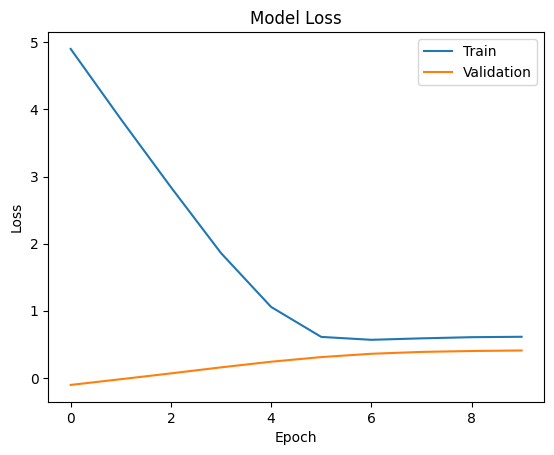

In [317]:
# Plot grafik loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()